# Linear Regression


In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [59]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

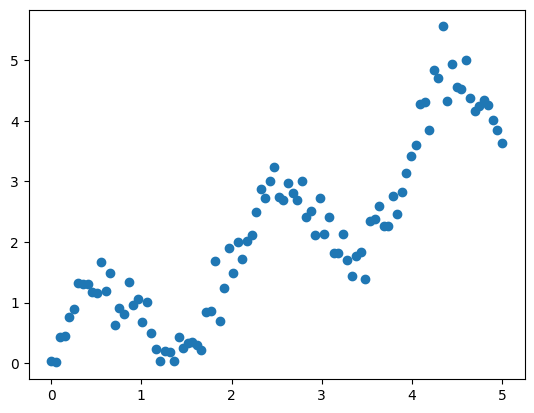

In [60]:
plt.scatter(x,y)

#### nonlinear

In [61]:
regr_lin = LinearRegression()

In [62]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [63]:
regr_lin.fit(X,y)

LinearRegression()

0.5359277382854389


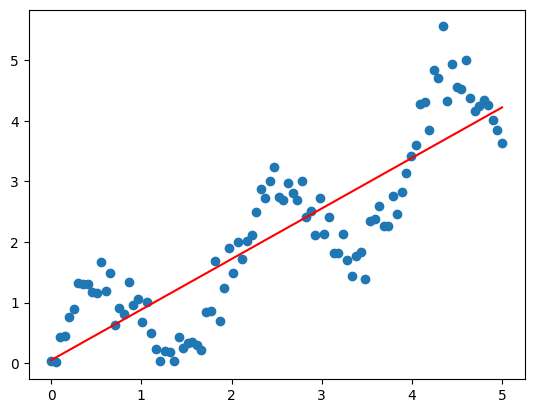

In [64]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [65]:
print(x.shape)

(100,)


In [66]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [67]:
regr_poly = LinearRegression()

In [68]:
regr_poly.fit(X_poly, y)

LinearRegression()

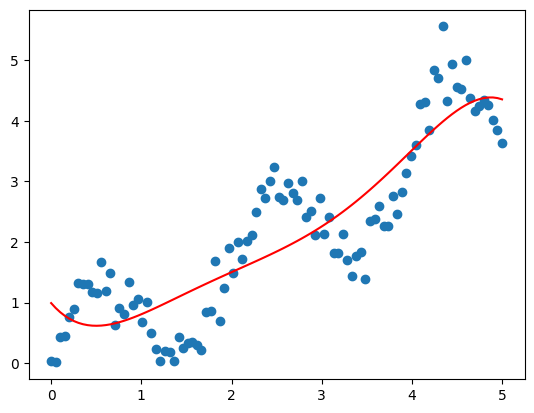

In [69]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [70]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.73915951  2.52387668 -1.2190703   0.27165604 -0.0219002 ]
interception:  0.991588090715084


In [71]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.99158809, 0.91003427, 0.84043829, 0.78192043, 0.73364162,
       0.69480266, 0.66464329, 0.64244136, 0.62751197, 0.61920657,
       0.61691214, 0.6200503 , 0.62807646, 0.64047895, 0.65677815,
       0.67652563, 0.69930331, 0.72472256, 0.75242336, 0.78207341,
       0.81336731, 0.84602566, 0.87979422, 0.91444301, 0.9497655 ,
       0.9855777 , 1.02171731, 1.05804288, 1.09443291, 1.130785  ,
       1.16701502, 1.20305617, 1.2388582 , 1.27438649, 1.30962122,
       1.34455647, 1.3791994 , 1.41356934, 1.44769699, 1.48162348,
       1.51539955, 1.5490847 , 1.58274629, 1.6164587 , 1.65030245,
       1.68436336, 1.71873166, 1.75350115, 1.78876831, 1.82463147,
       1.86118991, 1.89854303, 1.93678946, 1.9760262 , 2.0163478 ,
       2.05784542, 2.10060602, 2.14471148, 2.19023776, 2.23725398,
       2.28582163, 2.33599364, 2.38781355, 2.44131466, 2.49651913,
       2.55343713, 2.612066  , 2.67238935, 2.73437622, 2.79798022,
       2.86313863, 2.9297716 , 2.99778121, 3.06705067, 3.13744

In [72]:
regr_poly.predict(X_poly)

array([0.99158809, 0.91003427, 0.84043829, 0.78192043, 0.73364162,
       0.69480266, 0.66464329, 0.64244136, 0.62751197, 0.61920657,
       0.61691214, 0.6200503 , 0.62807646, 0.64047895, 0.65677815,
       0.67652563, 0.69930331, 0.72472256, 0.75242336, 0.78207341,
       0.81336731, 0.84602566, 0.87979422, 0.91444301, 0.9497655 ,
       0.9855777 , 1.02171731, 1.05804288, 1.09443291, 1.130785  ,
       1.16701502, 1.20305617, 1.2388582 , 1.27438649, 1.30962122,
       1.34455647, 1.3791994 , 1.41356934, 1.44769699, 1.48162348,
       1.51539955, 1.5490847 , 1.58274629, 1.6164587 , 1.65030245,
       1.68436336, 1.71873166, 1.75350115, 1.78876831, 1.82463147,
       1.86118991, 1.89854303, 1.93678946, 1.9760262 , 2.0163478 ,
       2.05784542, 2.10060602, 2.14471148, 2.19023776, 2.23725398,
       2.28582163, 2.33599364, 2.38781355, 2.44131466, 2.49651913,
       2.55343713, 2.612066  , 2.67238935, 2.73437622, 2.79798022,
       2.86313863, 2.9297716 , 2.99778121, 3.06705067, 3.13744

#### RBF
常態分布

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [73]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [74]:
sigma = 0.3

In [75]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [76]:
regr_rbf = LinearRegression()

In [77]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

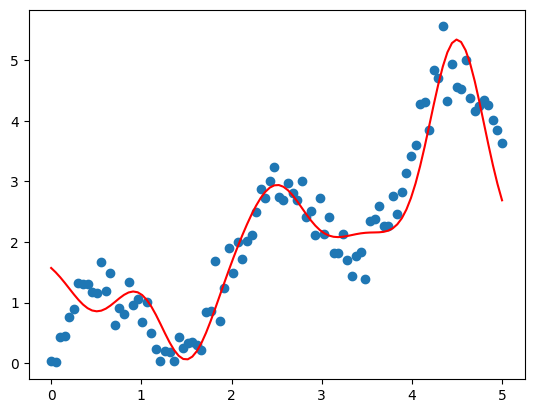

In [78]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [79]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.94458778 -1.7485981   1.14102206  0.32862845  3.53569133]
interception:  1.8072710026544712


#### Comparison

In [80]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

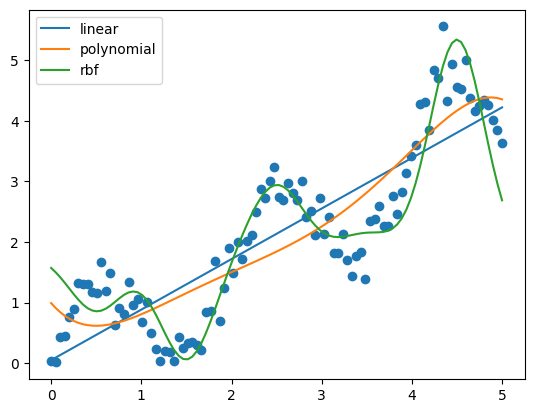

In [81]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [82]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5359277382854389


In [83]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4589619702640797


In [84]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23822445989187482
